In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
t_d = pd.read_csv('train.csv')

In [54]:
 titanic_data= t_d.dropna()


In [55]:
# printing the first 10 rows of the dataframe
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [56]:
titanic_data.shape

(183, 12)

In [57]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [58]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [59]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [60]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [61]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [62]:
print(titanic_data['Embarked'].mode()[0])

S


In [63]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [64]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [66]:
sns.set()

C:\Users\rampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

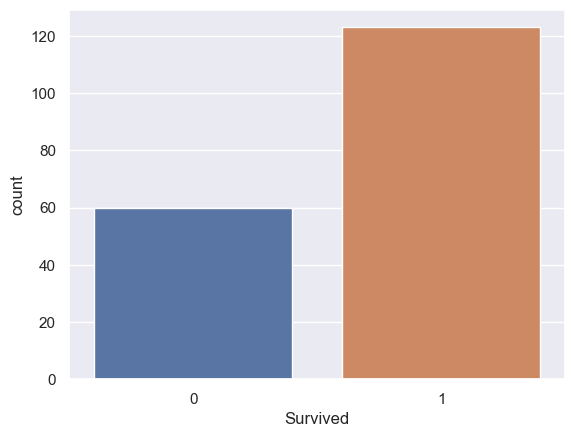

In [67]:
# making a count plot for "Survived" column
sns.countplot('Survived', data=titanic_data)

In [68]:
titanic_data['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

C:\Users\rampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

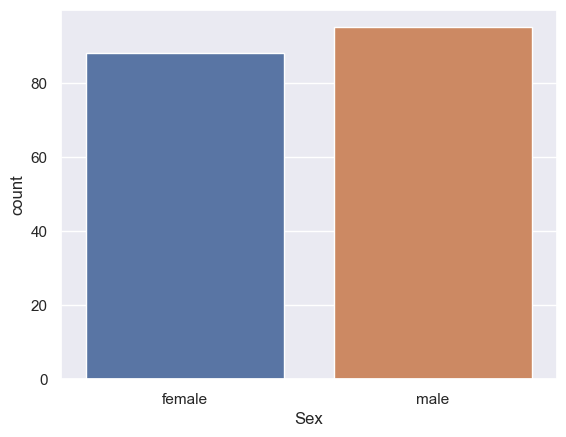

In [69]:
# making a count plot for "Sex" column
sns.countplot('Sex', data=titanic_data)

C:\Users\rampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

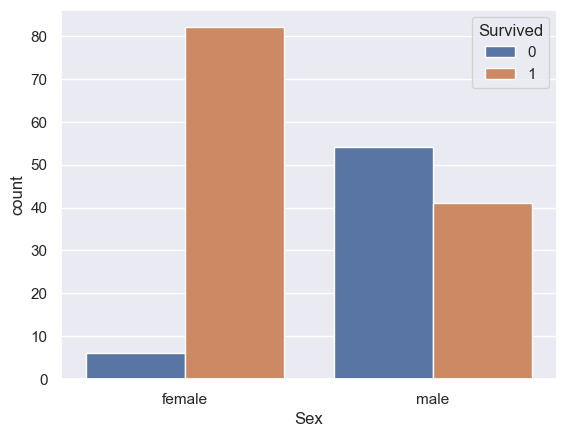

In [70]:
# number of survivors Gender wise
sns.countplot('Sex', hue='Survived', data=titanic_data)

C:\Users\rampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

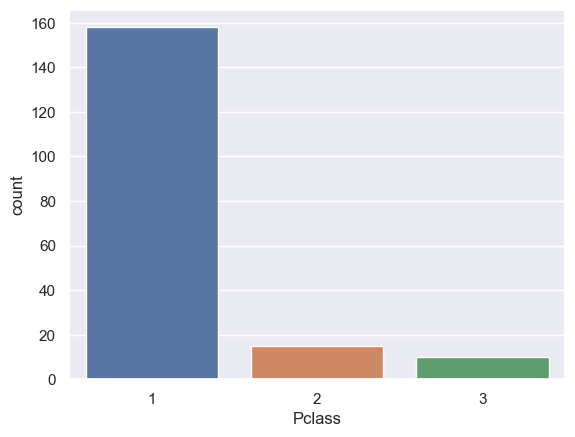

In [71]:
# making a count plot for "Pclass" column
sns.countplot('Pclass', data=titanic_data)

C:\Users\rampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

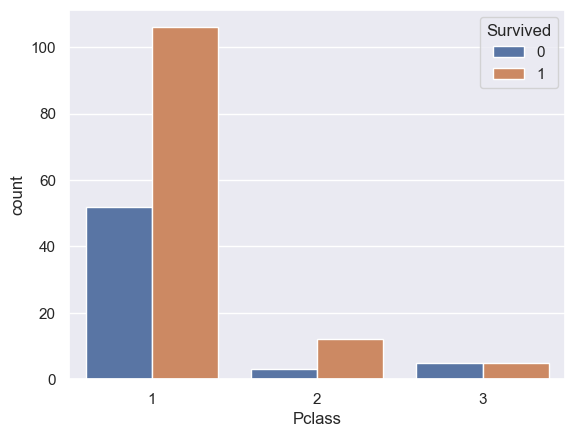

In [72]:
sns.countplot('Pclass', hue='Survived', data=titanic_data)

In [73]:
titanic_data['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [74]:
titanic_data['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

In [75]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [76]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [77]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1         1    1  38.0      1      0  71.2833         1
3         1    1  35.0      1      0  53.1000         0
6         1    0  54.0      0      0  51.8625         0
10        3    1   4.0      1      1  16.7000         0
11        1    1  58.0      0      0  26.5500         0
..      ...  ...   ...    ...    ...      ...       ...
871       1    1  47.0      1      1  52.5542         0
872       1    0  33.0      0      0   5.0000         0
879       1    1  56.0      0      1  83.1583         1
887       1    1  19.0      0      0  30.0000         0
889       1    0  26.0      0      0  30.0000         1

[183 rows x 7 columns]


In [78]:
print(Y)

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(183, 7) (146, 7) (37, 7)


In [81]:
model = LogisticRegression()

In [82]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\rampa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [84]:
print(X_train_prediction)

[1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1]


In [85]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7945205479452054


In [86]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [87]:
print(X_test_prediction)

[1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1]


In [88]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy  of test data : ', test_data_accuracy)

Accuracy  of test data :  0.7297297297297297
